In [1]:
from ROOT import TCanvas, TGraph, TH1F, TF1, TRandom3,TFile, gPad, TLegend, gROOT, gStyle, TH2F
from array import array
import math


Welcome to JupyROOT 6.26/06


# Leer un archivo MCA y hacer plot pyRoot

### importamos la libreria ROOT, de preferencia las clases que vayamos a ocupar solamente



### Creamos objeto de tipo TCanvas
TCanvas("nombre del objeto", "titulo de la grafica", puntos en x, puntos en y, tamaño de la imagen (x,y))
### Leemos el archivo del espectro y lo guardamos en un array()

In [53]:
c1 = TCanvas( 'c1', '', 300, 500, 1500, 1000 ) #(puntos en x,puntos en y, size (X,y))
#c1 = TCanvas()

#c1.SetFillColor( 42 )
c1.SetGrid()
#---------Style-----------
gROOT.SetStyle("Plain")
gStyle.SetOptStat(0)
#gPad.SetLogy(1)  #set the canvas in a log mode in y
#---------Style-----------

ran = TRandom3() 

#############
# #carga los datos del espectro en la variable "data"
n = 8192

x=array('d')
for i in range(0,8192):
    x.append(i)

#espectro=open('../20221013_10h_th15kev_bkgd.mca','r',encoding="ISO-8859-15")
espectro=open('./20221018_ba133_g10_3600s_th1.mca','r',encoding="ISO-8859-15")
data=array('d')
saveFlag=False

for line in espectro: 
    if saveFlag==True:
        if line.startswith('<<END>>'):
            saveFlag=False
        else:
            data.append(int(line))
    
    elif line.startswith('<<DATA>>'):
        saveFlag=True
    
    else:
        if line.startswith('GAIN='):
            gain=float(line.split(';', 1)[0].split('=')[1])
            print(gain)
        else:
            continue

#    if line.find('GAIN='):
#        gain = line
#        print(line)

    
#Gain = float(gain.split(';', 1)[0].split('=')[1])
#g = Gain[0].split('=')[1]
print(type(gain))
m = max(data) 
#############
 


9.999
<class 'float'>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [15]:
type(line)

<class cppyy.gbl.TF1 at 0x5614168a7ee0>

#### Llena el histograma utilizando SetBinContent

'\nfout = TFile("Background_60h_g5.root", "recreate", "Spectrum")\nfout.cd()\nhz.Write("hz")\nfout.Close()\n'

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hz (Potential memory leak).


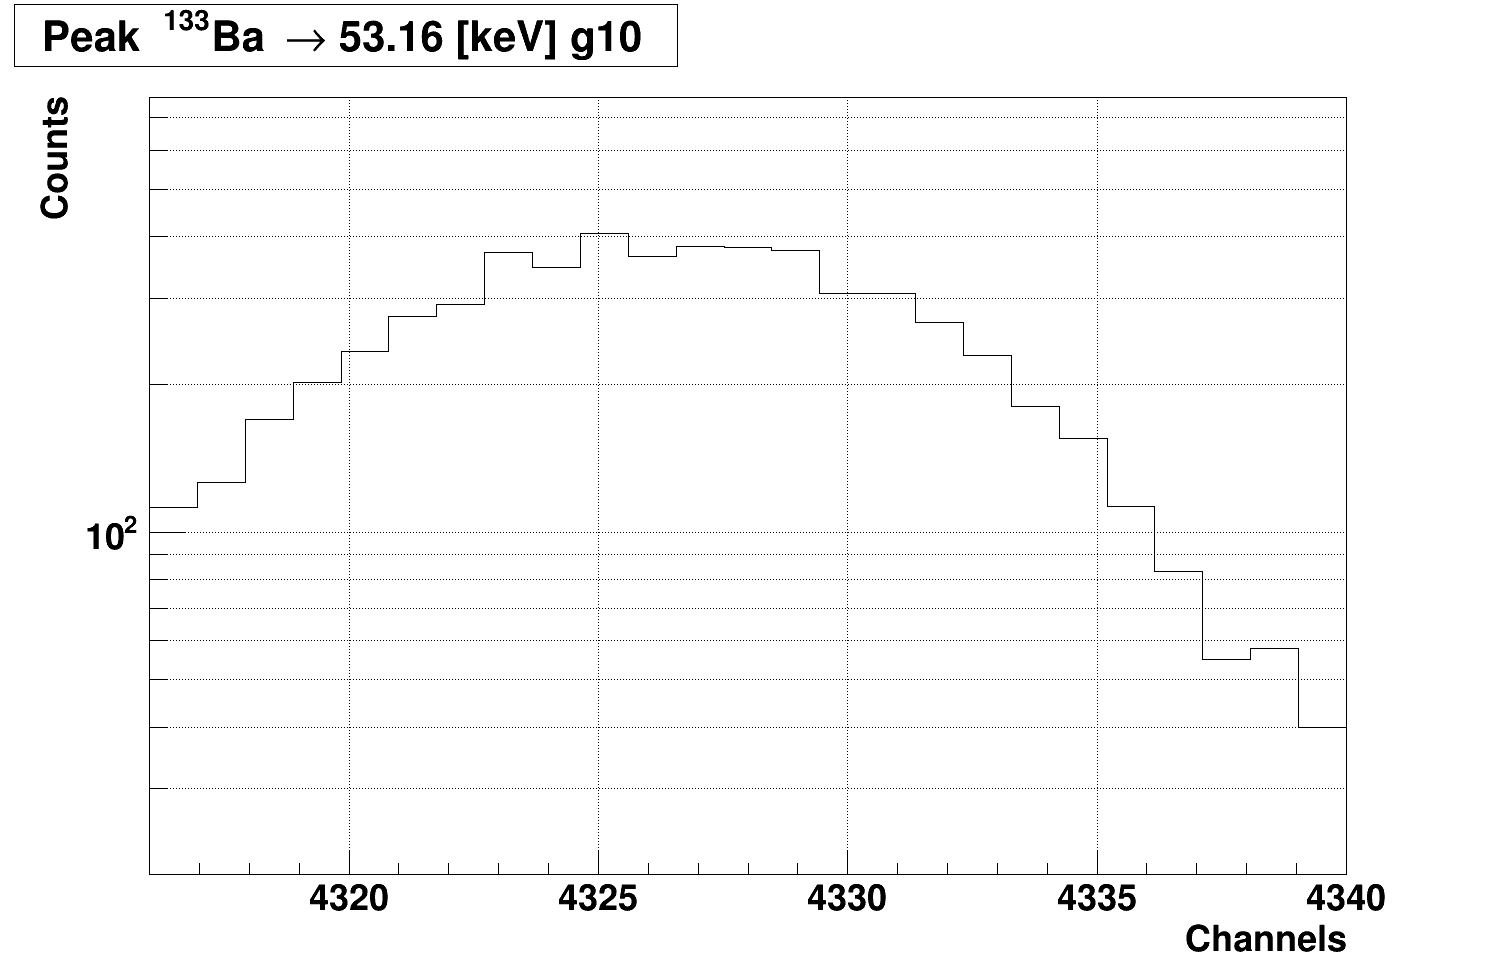

In [24]:
#define histogram
#histograma 1, el espectro completo
h = TH1F("h","Full",n,0,n) #parametros del histograma, de todo el espectro. Va de 0 a 8192

#histograma 2, el pico entre los canales 2830 y 2890
lo = 4316       #indices del histograma del pico
hi = 4340    #el espectro va de 1 a 8192, el pico que vamos a analizar comienza esta entre "lo"y "hi"
bins = hi-lo +1   #nùmero de bins en el Histograma 
hz = TH1F("hz","Peak ^{133}Ba #rightarrow 53.16 [keV] g10",bins,lo,hi) #definimos hz como el histograma del pico
hz.GetXaxis().SetTitle("Channels")
hz.GetYaxis().SetTitle("Counts")

for i in range(0,n): #en este for crea ambos histogramas. h, el espectro total; hz, el del pico
    h.SetBinContent(i+1,data[i]) #deposita el contenido del array en el histograma, 
    if i in range(lo,hi+1):      #bin a bin utilizando SetBinContent
        hz.SetBinContent(i-lo+1,data[i]) #define el rango entre "lo" y "hi"
                                        #y lo llenamos utilizando un for:

hz.Draw()
#h.Draw("same")
c1.Draw()

#c1.Print("Background 60h g5.pdf") #Print the first canvas before fitting curve 

#The following lines create a root file storing in a branch named "hz" """
"""
fout = TFile("Background_60h_g5.root", "recreate", "Spectrum")
fout.cd()
hz.Write("hz")
fout.Close()
"""

### Creamos una funcion de tipo TF1 llamada "fT"
La funcion contiene parametros que llamaremos por sus indices [0],[1],[2],...

### Insertar con latex formula de funcion gausiana con parametros [0],[1],[2],...
TF1("nombre", "formula en funcion de los indices", indice inferior, indice superior, numero de variables )

 FCN=18.2725 FROM HESSE     STATUS=NOT POSDEF     31 CALLS         325 TOTAL
                     EDM=1.63016e-09    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.40236e+03   2.91748e+02   3.27674e-02  -1.00551e-07
   2  p1           4.32649e+03   9.85040e-02   1.03152e-03  -5.76830e-04
   3  p2           5.75358e+00   2.10877e-01   7.19487e-06  -1.34235e-05
   4  p3          -8.17470e-01   7.60137e-03   2.43179e-07  -1.18994e-02
   5  p4           3.55525e+03   3.30105e+01   1.05328e-03  -2.72780e-06


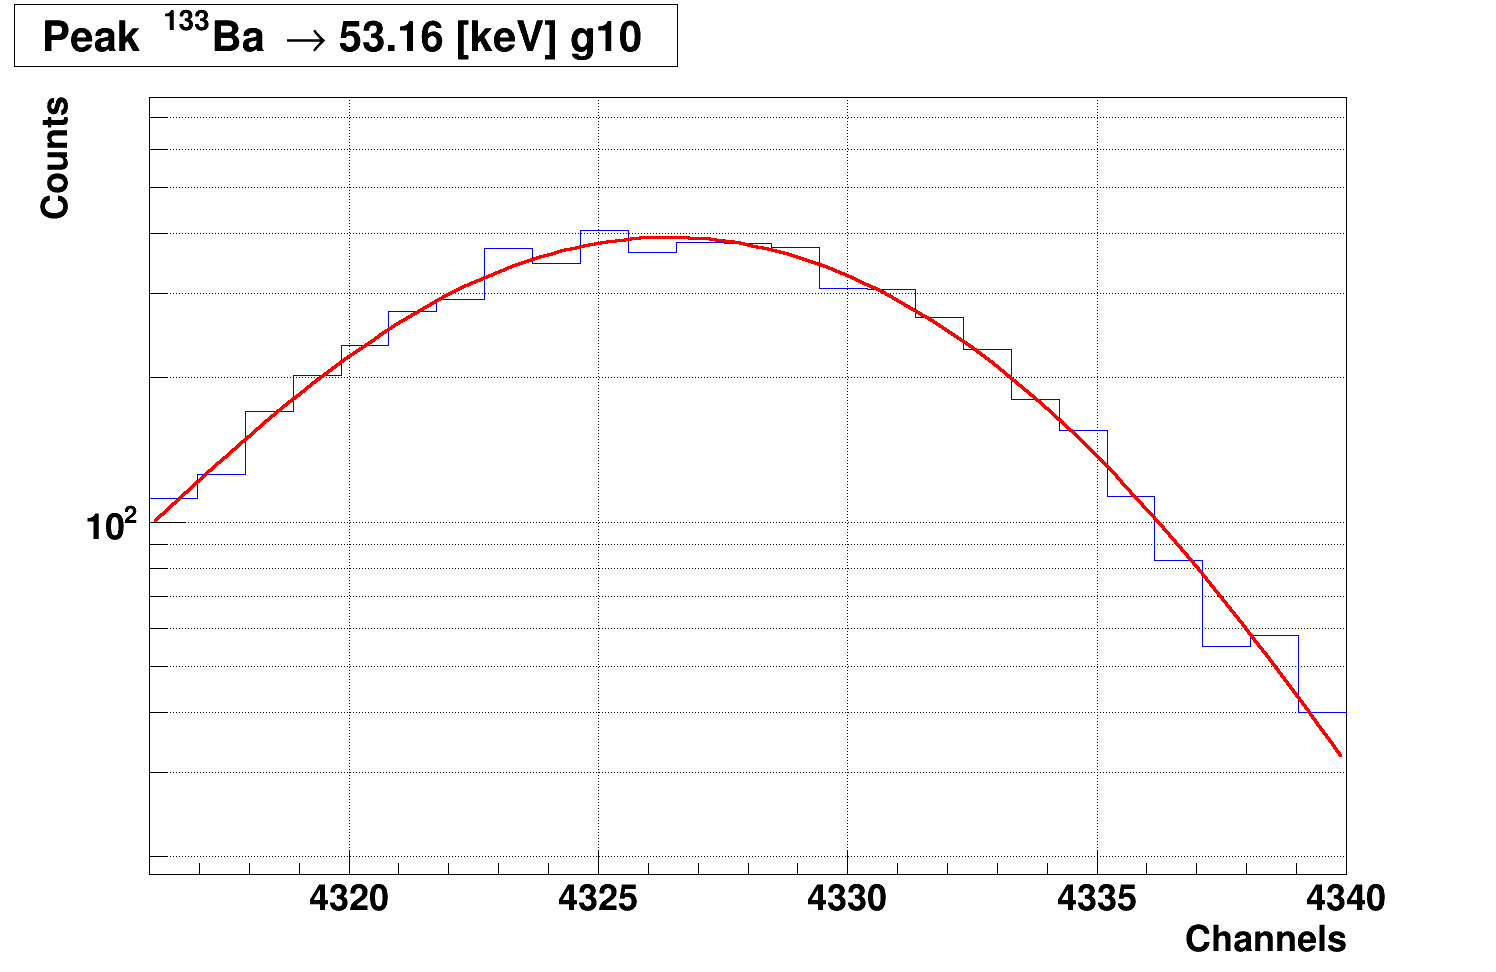

In [25]:
#Fit Gaussian + base line to peak histogram
#definimos la curva
# ft = curva gausiana que queremos ajustar y una linea con pendiente 0 y ordenada al origen 5 (background) 
fT = TF1("fT","[0]*(1/sqrt(2*3.14159*[2]^2)*exp(-0.5*((x-[1])/[2])^2))+ ([3]*x+[4])",lo,hi)
#establecemos unos valores iniciales de cada parametro, 
#fT.SetParameters(254.84,1368.44,4.8975,0,5) 
fT.SetParameters( 2400, 4326 , 6.22, 0 , 18)
#fT.FixParameter(3,0)
#fT.FixParameter(4,0)
# ajustamos la curva ft al histograma hz
hz.Fit(fT,"R") 


fT.SetLineColor(2)
hz.SetLineColor(4)

hz.Draw()
fT.Draw("same")
c1.Draw()
#c1.Print("Peak Ba133 g10 53.16 keV.pdf")



#### Si deseamos obtener los parametros de la curva gaussiana podemos hacerlo a traves del metodo 
#### GetParameter(numero del parametro)

In [1]:

norm = fT.GetParameter(0)   ############
mean = fT.GetParameter(1)   # Parametros de la Gaussiana
sigm = fT.GetParameter(2)   # devuelve los valores y podemos 
slop = fT.GetParameter(3)   # almacenarlos para manipularlos despues
cons = fT.GetParameter(4)   ############

chi2 = fT.GetChisquare()    ###
ndof = fT.GetNDF()          #datos de la calidad del ajuste
Prob = fT.GetProb()         ###
adjust = chi2/ndof          #Calidad del ajuste, si es cercano a 1, es bueno 

errenorm = fT.GetParError(0) #Obtiene el error del parametro 0
errmean  = fT.GetParError(1) #Obtiene el error del parametro 1
errsig   = fT.GetParError(2) #Obtiene el error del parametro 2



#Creamos una TF1 que sea una linea recta y la podamos graficar en el mismo TCanvas 
line = TF1("line", "[0]*x+[1]", lo, hi)
line.SetParameters(slop, cons)
line.SetLineColor(3)
line.SetLineWidth(2)


print("p0 = " + str(line.GetParameter(0)))
print("p1 = " + str(line.GetParameter(1)))


print("errmean = " + str(errmean))
print("norm = "+ str(norm))
print("mean = "+ str(mean))
print("sigm = "+ str(sigm))
print("slop = "+ str(slop))
print("cons = "+ str(cons))
print("chi2/ndof = "+ str(chi2)+"/"+str(ndof) + " = " + str(adjust) )
print("Prob = "+ str(Prob))

#Creamos un nuevo Canvas con los datos del ajuste e imprimimos el nuevo Canvas 

#-----Creamos strings para los nombres que vamos a usar en la clase TLegend-----
Normname = "N = " + str(round(norm, 2)) + " #pm " + str(round(errenorm,2)) + " [Ch]"
meanname = "#mu = " + str(round(mean, 2)) + " #pm " + str(round(errmean,2)) + " [Ch]"
sigmname = "#sigma = " + str(round(sigm, 2)) + " #pm " + str(round(errsig,2)) + " [Ch]"
chiname = "#chi^{2} / ndf = " + str(round(chi2, 2)) + " / " + str(ndof) 
probname = "Prob = " + str(round(Prob, 4))


#-----Se crean las leyendas que a parecen en el Canvas con los datos del ajuste y su probabilidad---
leg = TLegend(0.63,0.88,0.89,0.65)
leg.SetFillStyle(0)
leg.SetBorderSize(1)
leg.SetTextSize(0.025)
leg.AddEntry(fT,"Fitting Curve","l")
leg.AddEntry(hz, "Peak ^{60}Co #rightarrow 1173 [keV]","l")
leg.AddEntry(line, "Straight line", "l")
leg.AddEntry(0, Normname , "")
leg.AddEntry(0, meanname , "")
leg.AddEntry(0, sigmname , "")
leg.AddEntry(0, chiname , "")
leg.AddEntry(0, probname, "")


#hist_frame = TH2F("hist_frame","Peak ^{60}Co #rightarrow 1173 [keV] g3; Channels; Counts",1,lo,hi, 1, 0, 500)
#hist_frame.GetYaxis().SetTitleOffset(1.3)
#hz.GetYaxis().SetRangeUser(0, m+100)

c1.Draw()
#hist_frame.Draw()
hz.Draw()
line.Draw("same")
fT.Draw("same")
leg.Draw()



#c1.Print("Peak Na22 g3 1274.5 keV.pdf")

####
#   Con Pandas podemos crear un data frame bonito para mostrarlo



NameError: name 'fT' is not defined

Teniendo los datos de los Paràmetros, podemos almacenarlos en un array para posteriormente utilizarlos en los calculos de la eficiencia y la linealidad. Debemos tener cuidado con las ganancias, ya que estas son las que nos estan causando problemas al calcular la linelidad de canales contra eficiencia.


In [23]:
#creamos array para cada uno de los datos que vamos a ocupar (Solo se debe de iniciar una vez)
# de lo contrario solo de van a reiniciar los arrays que ya se hicieron y se borraran los datos 

name = []
ener = array("d")
meanarrg3 = array("d")
normarrg3 = array("d")
sigmarrg3 = array("d")
meanerrarrg3 = array("d")



Llenamos los array con los datos obtenidos del ajuste.
Estos arrays corresponden a los datos de una ganancia 3, en las siguiente parte del codigo, pondremos los demas con ganancias de 5 y 10

In [139]:
name.append("^{22}Na #rightarrow 1274.5 [keV]")
ener.append(1274.5)
meanarrg3.append(round(mean,4))
normarrg3.append(round(norm,4))
sigmarrg3.append(round(sigm,4))
meanerrarrg3.append(round(errmean,4))



Declaramos los array de ganancia 5 con diferente nombre.

In [7]:
print(name)
len(meanerrarrg3)

NameError: name 'name' is not defined

### Podemos establecer ambas curvas por separado, definamos
#### fG = curva gaussiana
#### fB = curva* background

#### * Segun nuestros datos de background esa curva puede ser una recta con pendiente 0 o algun polinomio de grado 2

In [122]:

#Get Gaussian and line separately
fG = TF1("fG","[0]*(1/sqrt(2*3.14159*[2]^2)*exp(-0.5*((x-[1])/[2])^2))",lo,hi,3)
fB = TF1("fB","[0]*x+[1]",lo,hi,2)

# Curva Gaussiana
fG.SetParameter(0,norm) ########
fG.SetParameter(1,mean) #los parametros de las curvas son tomados de la ecuacion previa ft,    
fG.SetParameter(2,sigm) #pero podemos definirlos nuevamente
fG.SetLineColor(2)      #

# Curva de Background
fB.SetParameter(0,slop) ########
fB.SetParameter(1,cons)
fB.SetLineColor(4)

In [123]:

hz.SetTitle( '40K Peak Histogram' )
hz.GetXaxis().SetTitle( 'X Channels' )
hz.GetYaxis().SetTitle( 'Y Counts' )

fT.Draw("same")
fB.Draw("same")


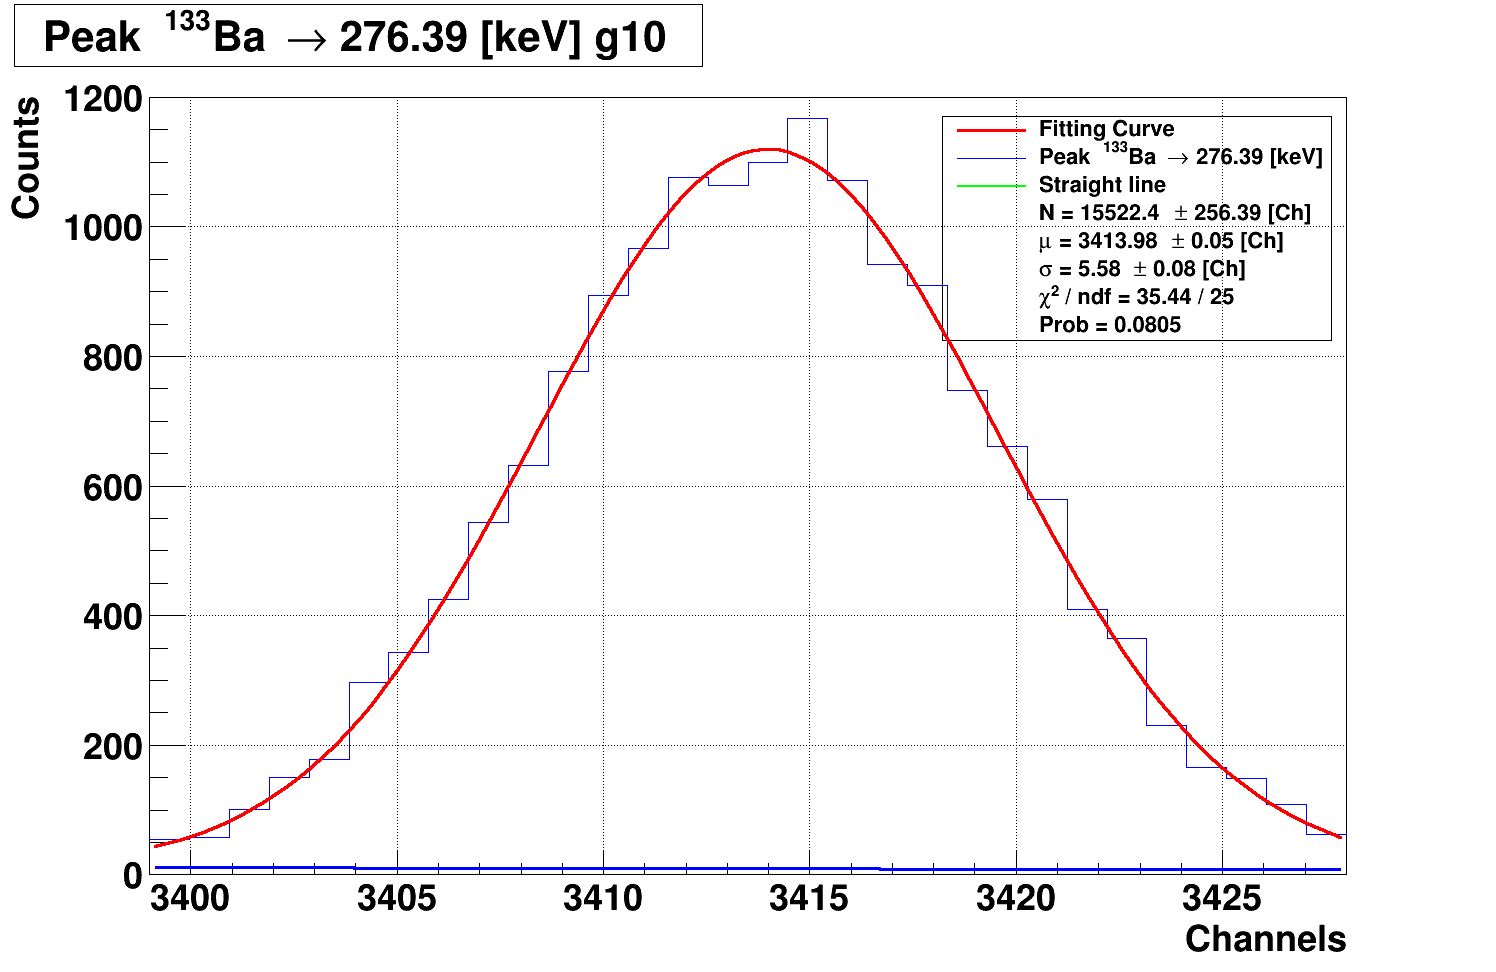

In [124]:

c1.Update()

c1.Modified()
c1.Update()
c1.Draw()

Operaciones con Histogramas.

Dado que tenemos ya los archivos ROOT creados, podemos leer esos archivos y hacer operaciones con ellos, para presentarlos en un mismo canvas.


8191


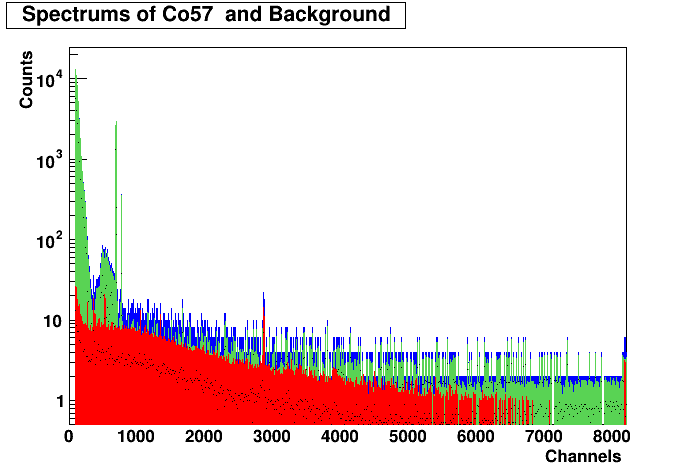

In [125]:
#code to read 2 differents histograms 
h1 = TFile.Open("Photopeak_90keV_Simulation.root", "READ") #Abrir el archivo y leerlo
tree = h1.Get("hz")                                #Abrimos el arbol del archivo Root que queremos ocupar
h1f = TH1F("data1", "Spectrums of Co57  and Background", 8192, 0 , 8191) #Creamos el histograma donde vamos a guardar los datos 

m = tree.GetEntries()
m = int(m)
print(m)

for entryNum in range (0, m):
    h1f.SetBinContent(entryNum, tree.GetBinContent(entryNum))

h2 = TFile.Open("Background_60h_g5.root", "READ") 
tree2 = h2.Get("hz")                               
h2f = TH1F("data2", "", 8192, 0 , 8191) 
h3f = TH1F("data3", "", 8192, 0 ,8191)

for entryNum in range (0, m):
    h2f.Fill(entryNum, (1./30.)*tree2.GetBinContent(entryNum))
    h3f.Fill(entryNum, tree.GetBinContent(entryNum) - (1./30.)*tree2.GetBinContent(entryNum))

#h2f.Scale(1./30.)




"""
fout = TFile("Spectrum_Co57-Bckgd.root", "recreate", "Spectrum")
fout.cd()
h1f.Write("hz")
h3f.Write("hz")
fout.Close()
"""

c1 = TCanvas("", "Spectrums of Ba133 and Cd109 g10")
c1.Draw()
gPad.SetLogy(1)

h1f.GetXaxis().SetTitle("Channels")
h1f.GetYaxis().SetTitle("Counts")

h1f.SetLineColor(4)
h2f.SetLineColor(2)
h3f.SetLineColor(8)

h1f.Draw("same")
h3f.Draw("same")
h2f.Draw("same")
#c1.Print("Spectrums of Co57 and Background.pdf")

In [126]:
h1 = TFile.Open("Spectrum_Ba133_g10.root", "READ") #Abrir el archivo y leerlo
tree = h1.Get("hz")                                #Abrimos el arbol del archivo Root que queremos ocupar
h1f = TH1F("data", "Spectrum Ba133 g10", 8191, 0 , 8191) #Creamos el histograma donde vamos a guardar los datos 


# De aqui en adelante ya son pruebas y cosas raras

In [127]:
type(Normname)

str

In [128]:
# hx = TH1F("hx","Peak",60,lo,hi)
# for i in range(0,540):
#     rval = fT.GetRandom()
#     hx.Fill(rval)

# f = fT.Integral(lo,hi)/hx.Integral()
# hx.Scale(f)
# hx.SetLineStyle(1)
# hx.SetLineWidth(2)

hz.SetTitle( '40K Peak Histogram' )
hz.GetXaxis().SetTitle( 'X Channels' )
hz.GetYaxis().SetTitle( 'Y Counts' )
#hz.Draw( 'h' )
fT.Draw("same")
fB.Draw("same")
#fG.Draw("same")
#hx.Draw("same h")


c1.Update()

c1.Modified()
c1.Update()
c1.Draw()


AttributeError: 'CPyCppyy_NoneType' object has no attribute 'SetTitle'

In [ ]:
import ROOT
 
# Set up model
# ---------------------
# Declare variables x,mean,sigma with associated name, title, initial
# value and allowed range
x = ROOT.RooRealVar("x", "x", -10, 10)
mean = ROOT.RooRealVar("mean", "mean of gaussian", 1, -10, 10)
sigma = ROOT.RooRealVar("sigma", "width of gaussian", 1, 0.1, 10)
 
# Build gaussian pdf in terms of x,mean and sigma
gauss = ROOT.RooGaussian("gauss", "gaussian PDF", x, mean, sigma)
 
# Construct plot frame in 'x'
xframe = x.frame(Title="Gaussian pdf")  # RooPlot
 
# Plot model and change parameter values
# ---------------------------------------------------------------------------
# Plot gauss in frame (i.e. in x)
gauss.plotOn(xframe)
 
# Change the value of sigma to 3
sigma.setVal(3)
 
# Plot gauss in frame (i.e. in x) and draw frame on canvas
gauss.plotOn(xframe, LineColor="r")
 
# Generate events
# -----------------------------
# Generate a dataset of 1000 events in x from gauss
data = gauss.generate({x}, 10000)  # ROOT.RooDataSet
 
# Make a second plot frame in x and draw both the
# data and the pdf in the frame
xframe2 = x.frame(Title="Gaussian pdf with data")  # RooPlot
data.plotOn(xframe2)
gauss.plotOn(xframe2)
 
# Fit model to data
# -----------------------------
# Fit pdf to data
gauss.fitTo(data)
 
# Print values of mean and sigma (that now reflect fitted values and
# errors)
mean.Print()
sigma.Print()
 
# Draw all frames on a canvas
c = ROOT.TCanvas("rf101_basics", "rf101_basics", 800, 400)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
xframe.GetYaxis().SetTitleOffset(1.6)
xframe.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
xframe2.GetYaxis().SetTitleOffset(1.6)
xframe2.Draw()
 
#c.SaveAs("rf101_basics.png")


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         1.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 sigma        3.00000e+00  9.90000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION

In [ ]:
c.SaveAs("rf101_basics.png")

Info in <TCanvas::Print>: png file rf101_basics.png has been created


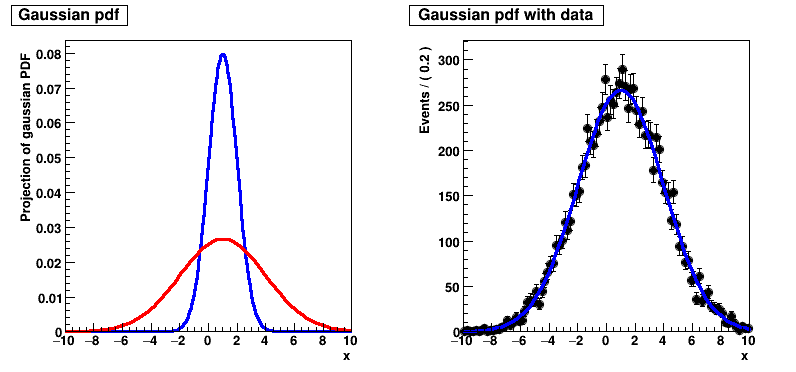

In [ ]:
c.Draw()


In [ ]:
from random import random

cadena = []
for i in range(0,100):
    cadena.append(random()*100)

